In [45]:
'''
Necessary Module Import
'''
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection

In [46]:
'''
Data Import
'''
data_source = "/home/oli/PycharmProjects/cheminformatics/data/"
data =  pd.read_csv(data_source + "raw/training_subset.csv")
data1 = data.copy()
data =  pd.read_csv(data_source + "raw/processed_test_subset.csv")
data2 = data.copy()
features_labels = ['MW','Sv','Si','nROH','nOHp','nHDon','nHAcc','Hy','MLOGP','ALOGP']
train_features = np.asarray([data1['MW'], data1['Sv'], data1['Si'], data1['nHDon'], data1['nHAcc'], data1['Hy'], data1['ALOGP'], data1['MLOGP'], data1['nOHp'], data1['nROH']]).T
test_features = np.asarray([data2['MW'], data2['Sv'], data2['Si'], data2['nHDon'], data2['nHAcc'], data2['Hy'], data2['ALOGP'], data2['MLOGP'], data2['nOHp'], data2['nROH']]).T

#features = ['MW','Sv','Si','nHAcc','Hy']
#train_features = np.asarray([data1['MW'], data1['Sv'], data1['Si'], data1['nHAcc'], data1['Hy']]).T
#test_features = np.asarray([data2['MW'], data2['Sv'], data2['Si'], data2['nHAcc'], data2['Hy']]).T

train_labels_dummy = np.asarray(np.log10([data1['S0 (mM)']])).T
train_labels = train_labels_dummy.astype(float)
a = np.asarray(data2['S (_g/L)'])
b = np.asarray(data2['MW'])
test_labels = []
for i in range(a.shape[0]):
        test_labels.append(np.log10(float(1000*float(a[i,])/float(b[i]))))
X = train_features
y = train_labels.flatten()

X1 = test_features
y1 = test_labels

NAME
SMILES
S0 (mM)
MW
Sv
Si
nROH
nOHp
nHDon
nHAcc
Hy
MLOGP
ALOGP


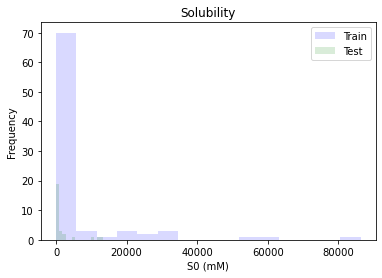

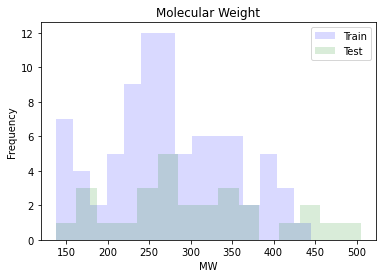

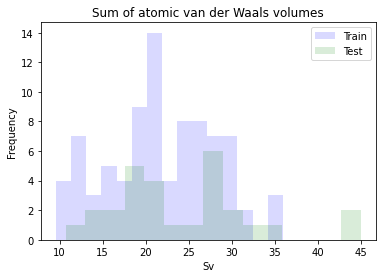

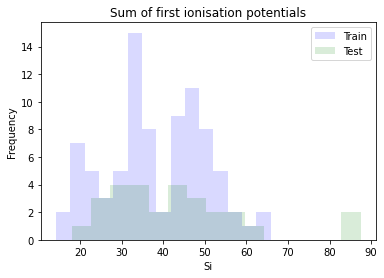

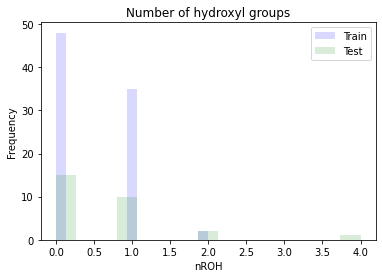

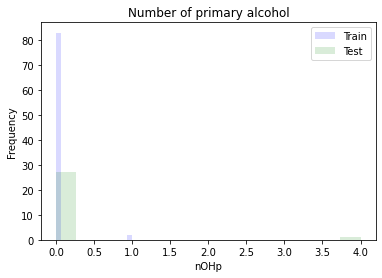

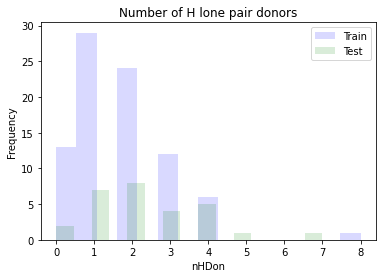

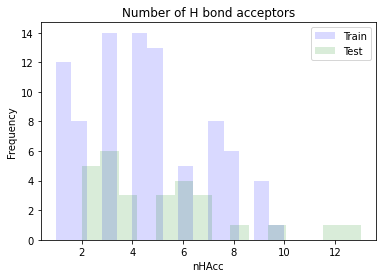

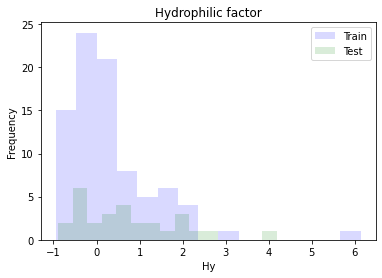

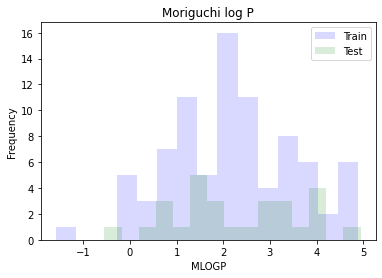

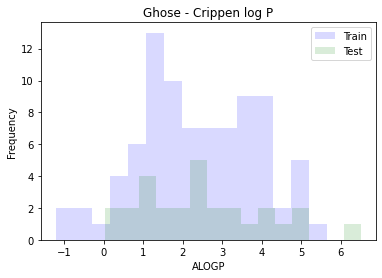

In [47]:
'''
RDkit modelling
'''
training = data1.copy()
test = data2.copy()

a = np.asarray(data2['S (_g/L)'])
b = np.asarray(data2['MW'])
dummy = []
for i in range(a.shape[0]):
        dummy.append(float(1000*float(a[i,])/float(b[i])))
test['S0 (mM)'] = dummy
test.drop(columns='S (_g/L)')

print('COLUMN HEADS (Descriptors)')
for col in training.columns: 
    print(col) 

dict = {}
dict['S0 (mM)'] = 'Solubility'
dict['MW'] = 'Molecular Weight'
dict['Sv'] = 'Sum of atomic van der Waals volumes'
dict['Si'] = 'Sum of first ionisation potentials'
dict['nROH'] = 'Number of hydroxyl groups'
dict['nOHp'] = 'Number of primary alcohol'
dict['nHDon'] = 'Number of H lone pair donors'
dict['nHAcc'] = 'Number of H bond acceptors'
dict['Hy'] = 'Hydrophilic factor'
dict['MLOGP'] = 'Moriguchi log P'
dict['ALOGP'] = 'Ghose - Crippen log P'


for col in training.columns:
    if col != 'NAME' and col != 'SMILES':
        fig,ax = plt.subplots()
        ax = training['{:}'.format(col)].plot.hist(bins=15, alpha=0.15, color='b', label='Train')
        ax = test['{:}'.format(col)].plot.hist(bins=15, alpha=0.15, color='g', label = 'Test')
        ax.set_title('{:}'.format(dict[col]))
        ax.set_xlabel('{:}'.format(col))
        plt.legend()
        plt.show()

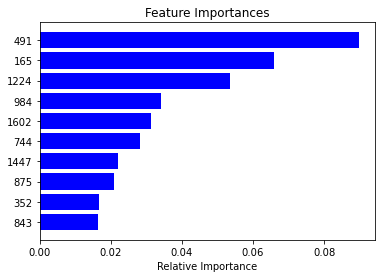

(85, 2048)
(85, 10)
Train Data Score : 0.5034581631231545
Test Data Score : -0.5072955427567083
0.5034581631231545
-0.5072955427567083
[1860, 1952, 1946, 1339, 1944, 1490, 1351, 1519, 1354, 1335]




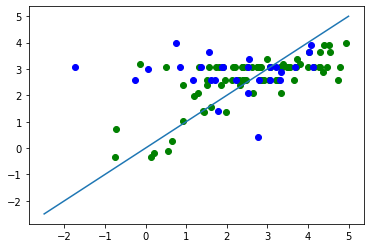

In [48]:
data_source = "/home/oli/PycharmProjects/cheminformatics/data/"
data =  pd.read_csv(data_source + 'raw/training_subset.csv')
data1 = data.copy()
data1['Solubility'] = np.log10(data1['S0 (mM)'])
data1 = data1.drop(columns=['S0 (mM)'])
data =  pd.read_csv(data_source + 'raw/processed_test_subset.csv')
data2 = data.copy()
a = np.asarray(data2['S (_g/L)'])
b = np.asarray(data2['MW'])
test_labels = []
for i in range(a.shape[0]):
        test_labels.append(np.log10(float(1000*float(a[i,])/float(b[i]))))
data2['Solubility'] = test_labels
data2 = data2.drop(columns=['S (_g/L)'])

smiles = data1['SMILES']
smiles1 = data2['SMILES']

mols = [Chem.MolFromSmiles(j) for j in smiles]
mols1 =  [Chem.MolFromSmiles(j) for j in smiles1]

fps = [AllChem.GetMorganFingerprintAsBitVect(k, 2) for k in mols]
fps1 = [AllChem.GetMorganFingerprintAsBitVect(k, 2) for k in mols1]

fp_np = []
for n in fps:
   
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(n, arr)
    fp_np.append(arr)

fp_np1 = []
for n in fps1:

    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(n, arr)
    fp_np1.append(arr)


activity = data1.Solubility.values
activity1 = data2.Solubility.values

flt_activity = []

for n in range(len(activity)):
   
    flt_activity.append(float(activity[n]))

flt_activity1 = []

for n in range(len(activity1)):

    flt_activity1.append(float(activity1[n]))


rdkit_X = np.asarray(fp_np)
rdkit_y = flt_activity
rdkit_X1 = np.asarray(fp_np1)
rdkit_y1 = flt_activity1

'''
Using all of the RDkit varaibles
'''

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(rdkit_X,rdkit_y)
features = [i for i in range(rdkit_X1.shape[1])]
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.fit_transform(X)
#X1 = scaler.transform(X1)
print(rdkit_X.shape)
X_reduced = []
X1_reduced = []
for i in range(10):
    X_reduced.append(rdkit_X[:,indices[i]])
    X1_reduced.append(rdkit_X1[:,indices[i]])
X_reduced = np.asarray(X_reduced).T
X1_reduced = np.asarray(X1_reduced).T
print(X_reduced.shape)

'''
Using only the 10 most signficant descriptors (as decided by Random Forest feature reduction)
'''

reg = LinearRegression().fit(X_reduced,rdkit_y)
print('Train Data Score :',reg.score(X_reduced, rdkit_y))
print('Test Data Score :',reg.score(X1_reduced,rdkit_y1))
plt.scatter(rdkit_y, reg.predict(X_reduced), color='g')
plt.scatter(rdkit_y1, reg.predict(X1_reduced), color='b')
plt.plot([-2.5,5], [-2.5,5])
plt.show()


print(reg.score(X_reduced,rdkit_y))
print(reg.score(X1_reduced,rdkit_y1))

importance = []
for i in range(10):
    importance.append(np.argsort(importances).tolist().index(i))

print(importance)

#
'''
Advanced Statistics , showing the very low p values
'''
#
#model = sm.OLS(y,X)
#results = model.fit()
#print('Ordinary Least Squares Regression : Train data')
#print(results.summary())
#
#model = sm.OLS(y1,X1)
#results = model.fit()
#print('Ordinary Least Squares Regression : Test data')
#print(results.summary())
#
print('\n')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

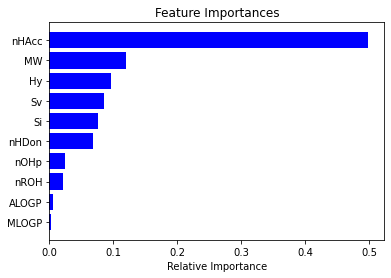

In [49]:
'''
Relative Importances of descriptors, predicted by Random Forest Regressor
'''
print(features)
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_labels[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.savefig('/Users/oli/Desktop/significance.png')
plt.show()


       Coefficient
MW        0.540451
Sv       -2.538175
Si        2.024888
nROH     -0.228717
nOHp     -0.272308
nHDon    -0.250131
nHAcc    -0.961901
Hy       -0.090034
MLOGP    -0.032635
ALOGP     0.110365
2.615429188181917
Train Data Score : 0.6149167886575545
Test Data Score : 0.4691149662212404


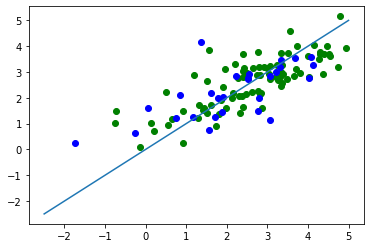

In [50]:
'''
Standard OLS linear regression
'''
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)
X1 = scaler.transform(X1)

reg = LinearRegression().fit(X,y)
coeff_df = pd.DataFrame(reg.coef_, features_labels, columns=['Coefficient'])
print(coeff_df)
print(reg.intercept_)

print('Train Data Score :',reg.score(X, y))
print('Test Data Score :',reg.score(X1,y1))
plt.scatter(y, reg.predict(X), color='g')
plt.scatter(y1, reg.predict(X1), color='b')
plt.plot([-2.5,5], [-2.5,5])
plt.show()
#print('\n', '\n')
#model = sm.OLS(y,X)
#results = model.fit()
#print('Ordinary Least Squares Regression : Train data')
#print(results.summary())
#print('\n', '\n')
#model = sm.OLS(y1,X1)
#results = model.fit()
#print('Ordinary Least Squares Regression : Test data')
#print(results.summary())


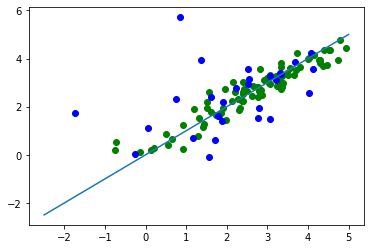

Train Data Score : 0.8958451225483424
Test Data Score : -0.1674019030457039

 

Train Data Score : 0.9226120497323186
Test Data Score : 0.2765491869152211

 



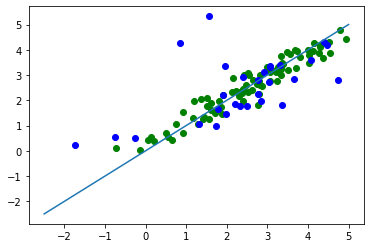

In [52]:
'''
Neural Net
'''

scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)
X1 = scaler.transform(X1)

clf = MLPRegressor(solver='adam', alpha=1e-3, hidden_layer_sizes=(80), max_iter=400000)
clf.fit(X,y)

plt.scatter(y, clf.predict(X), color='g')
plt.scatter(y1, clf.predict(X1), color='b')
plt.plot([-2.5,5], [-2.5,5])
plt.show()
print('Train Data Score :',clf.score(X,y))
print('Test Data Score :',clf.score(X1,y1))
print('\n', '\n')
####################################################################################################################
all_X = np.vstack((train_features,test_features))
all_y = np.concatenate((train_labels.flatten(),test_labels))
X_train, X_test, y_train, y_test = model_selection.train_test_split(all_X, all_y, train_size=0.75,test_size=0.25, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clz = MLPRegressor(solver='adam', alpha=1e-3, hidden_layer_sizes=(80), max_iter=400000)
clz.fit(X_train,y_train.ravel())

plt.scatter(y_train.ravel(), clz.predict(X_train), color='g')
plt.scatter(y_test, clz.predict(X_test), color='b')
plt.plot([-2.5,5], [-2.5,5])
plt.show()

print('Train Data Score :',clz.score(X_train, y_train))
print('Test Data Score :',clz.score(X_test,y_test))
print('\n', '\n')
